# COMP5318/COMP4318 Week 4: Naive Bayes. Model evaluation.

## 1. Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import signal

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#for accuracy_score, classification_report and confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

# to make this notebook's output stable across runs
np.random.seed(42)

## 2. Introduction

In this tutorial we will firstly learn how to create a Naive Bayes (NB) classifier in sklearn. Then we will learn how to obtain different performance metrics (precision, recall, F1-score and confusion matrix), how to apply different procedures for evaluating the performance of classifiers (cross-validation and leave-one-out) and finally, how to use grid search with cross-validation for model selection.

## 3. Creating an NB classifier



### **Recap**

#### **Naive Bayes**

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/0*YI1WuCjXGEKyfo0o" width="400">

> **The Assumption of Independence**: the Naive Bayes algorithm assumes that all the features are **independent and equal contribution** to the outcome $→$ *Naive* approach, highly unlikely to be encountered in real life.

Assume that the event B above consists of several sub-events as B1, B2, B3, B4, the naive assumption can be accommodated in the Bayes theorem:

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/0*Azg21fNttoHeePYv" width=600>

In Machine Learning, B is often the feature set and A is a class label.

###### Q: Probability vs. Likelihood?

* `probability` refers to the possibility of something happening  
* Use `probability` if you want to measure the chance of occurrence of data given a specific distribution

<img src="https://sebastianraschka.com/images/faq/probability-vs-likelihood/probability.png" width="400">

> *E.g., The probability of drawing a sample x with a value between 0 and 0.5 for a standard normal distribution (mean 0 and standard deviation 1)*

*  `likelihood` refers to the process of determining the best data distribution given a specific situation in the data.
*  Use `likelihood` if you want to measure the fitness of a model given some data

<img src="https://sebastianraschka.com/images/faq/probability-vs-likelihood/likelihood-2.png" width="400">

> *E.g., The likelihood of a fixed data point x=0.5 for two different normal distributions*

#### NB Example

**Features:** `Outlook`, `Temp`, `Humidity`, and `Windy`

**Target:** Predict whether a person or team will play tennis or not.

**Size**: 14 samples (5 no + 9 yes)


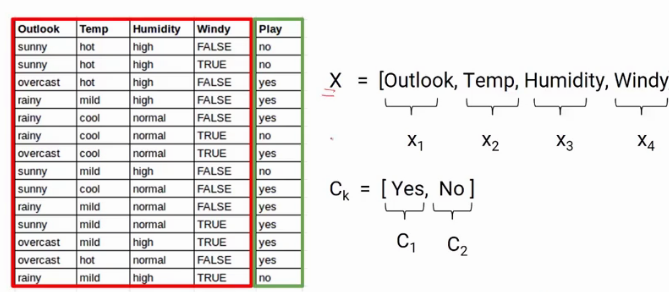

In Naive Bayes for every observation, we determine the probability that it belongs to class 1 or class 2.

Apply Naive Bayes formula:

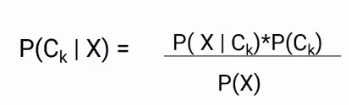

Now we have two classes and four features, so if we write this formula for class C1, it will be something like this.

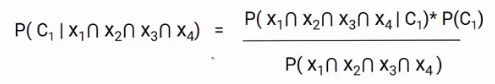

###### Independence Assumption

With the indepedence assumption, we can further simplify the above formula and write it in this form

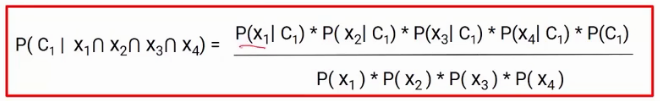

##### **Prediction**: `Outlook` = sunny, `Temp` = hot, `Humidity` = high, `Windy` = False

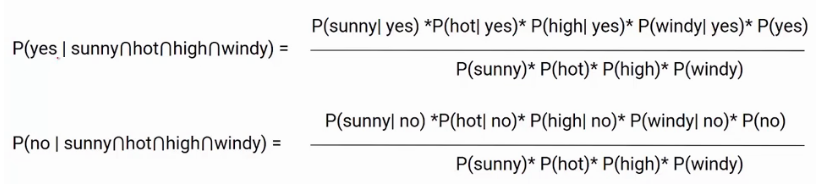

**Sample calculations:**

P(yes) = $\frac{9}{14}$

P(sunny|yes) =  $\frac{2}{9}$

P(hot|yes) =  $\frac{2}{9}$

...

##### **Classification**:

*   If $P(C_1 | X) > P(C_2 | X)$ $→$ **Yes**
*   If $P(C_1 | X) < P(C_2 | X)$ $→$ **No**



#### Zero-Frequency Problem

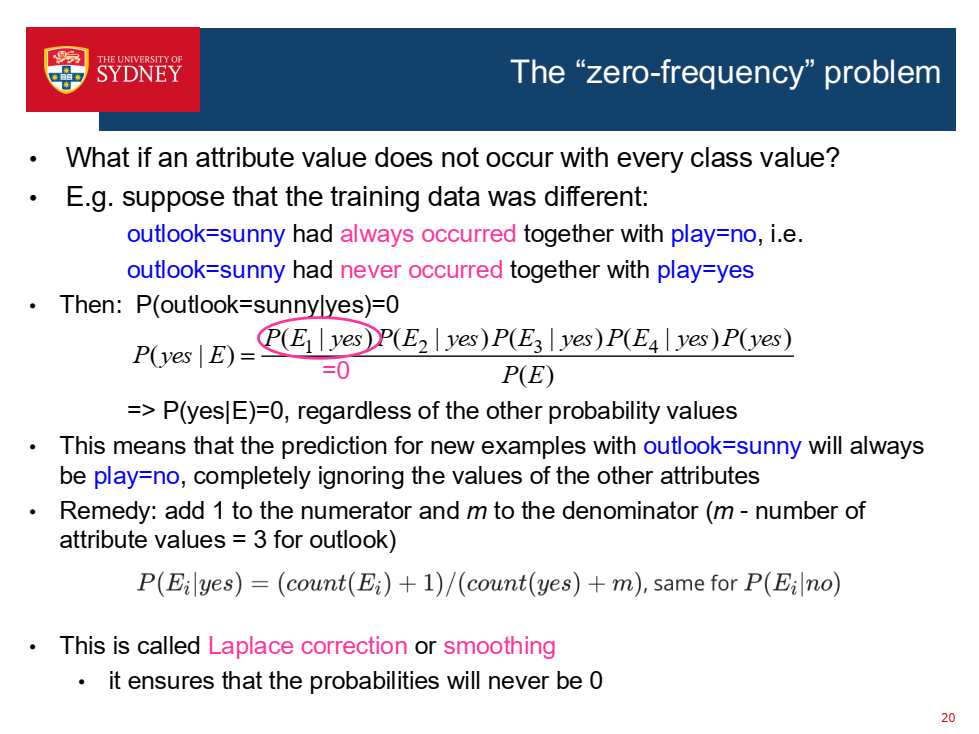

[Reference](https://medium.com/atoti/how-to-solve-the-zero-frequency-problem-in-naive-bayes-cd001cabe211)

#### Type of Naive Bayes

##### **Gaussian Naive Bayes**: the features are all numeric.

```
0.21  0.72  0.300  high
0.19  0.65  0.325  low
0.20  0.70  0.297  medium
. . .
```

##### **Multinomial Naive Bayes**: the features are all integer counts.
```
5  9  16  3  1  mathematics
4  7  11  0  0  psychology
6  6   9  2  1  history
. . .
```


##### **Bernoulli Naive Bayes**:  the features are all Boolean/binary.

```
yes  no   yes  yes  no   no   democrat
yes  yes  yes  no   yes  yes  republican
no   no   yes  no   no   no   republican
. . .
```


##### **Categorical**: the features are all categorical.
```
alaska   male    white  technical
georgia  male    white  management
oregon   female  asian  sales
. . .
```

### **Implementation**

There are four main types of NB classifiers in sklearn:  <b>GaussianNB</b>, <b>CategoricalNB</b>,  <b>MultinomialNB</b> and <b>BernoulliNB</b>.

- The first two are the ones we discussed at the lecture -  <b>GaussianNB</b> is applicable to numeric data, while <b>CategoricalNB</b> is applicable to categorical data.

- <b>BernoulliNB</b> and <b>MultinomialNB</b> are mostly used for text clasification; they assume binary data and count data respectively, e.g. how many times a word appears in a document.

In this tutorial we will create a NB for the iris data which is a numeric dataset, so we will use the <b>GaussianNB</b> class to create the classifier.

Let's load the iris data and create the training and test splits:

In [ ]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# create the training and test splits
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=42)

### **Task:**
Use GaussianNB from sklearn.naive_bayes to create an NB classifier on the training data and evaluate its acuracy on the test data.

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

#### Solution

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create an NB model using the training set and evaluate its accuracy on the test set
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred)))

Accuracy on test set: 0.921


## 4. More performance measures: precision, recall and F1 score. Confusion matrix.

### **Performance Metrics**

<img src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg" width="600">


#### Example:


<img src="https://miro.medium.com/v2/resize:fit:1400/1*ZobYhjM4ZfK9eVXluecg3g.jpeg" width="500">

##### **Accuracy**: How often a classification ML model is correct overall.

> The percentage of your prediction that were correct, both cats and not-cats.

##### **Precision**: Of all *positive predictions*, how many are *really positive*? (Measure of prediction quality)
> Every time AI say a picture is of a cat, precision measures how often AI is right.

##### **Recall (Sensitivity)**: Of all *actual positive cases*, how many are *predicted positive*? ((Measure of quantity)
>  Recall focuses on all the actual cat pictures and checks how many you correctly identified.

##### **F1-Score**: Combining both precision and recall using the harmonic mean of the two
>  Provides a single metric that balance precision and recall, if both are important for your task.

#### Multiclass Confusion Matrix

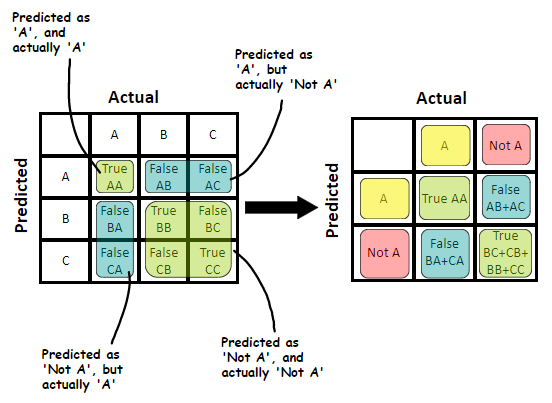

### **Implementation**

In addition to accuracy, we can calculate other performance measures - e.g. precision, recall and their combination - the F1-score. In sklearn this can be convenintly done using the <b>classification_report</b> method, which also shows the accuracy. The confusion matrix can be calculated using the <b>confusion_matrix</b> method.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

### **Task**:
1) Continuing on the previous exercise (NB classifier on the iris data), write the Python code to calculate precision, recall, F1 measure and confusion matrix on the test set by using the methods <b>classification_report</b> and <b>confusion_matrix</b>.

See:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

2) Examine the results:
- How are the precision, recall and F1-score calculated - per class or overall for the test set?
- Making sense of the confusion matrix: Where are the correctly classified examples? How many examples from class 1 are incorrectly classified as class 2?


#### Solution:

1) See the code below

In [ ]:
# calculate other performance measures - F1, precision and recall
#print(nb)
actual = y_test
predicted = nb.predict(X_test)
print(metrics.classification_report(actual, predicted))

# show the confusion matrix
print(metrics.confusion_matrix(actual, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.92      0.89        13
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]


2) Recall that there are 3 classes for the iris data:
`class 0 - setosa`, `class 1 - versicolor` and `class 2 - virginica`.
- Precision, recall and F1-score are calculated per class
- The `average accuracy` have two different version - **weighted** by the number of examples and **not weighted**.  

The confusion matrix is a 3-by-3 array:
- The rows correspond to the true classes and
- The columns correspond to the predicted class.

In the confusion matrix:
- 1 example from class 1 was incorrectly classified as class 2
- 2 examples from class 2 were incorectly classified as as class 1
- The correctly classified examples are along the main diagonal

## 5. Cross-validation for evaluating performance

A flowchart of typical cross validation workflow in model training.

<p align="center">
 <img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width=400>

</p>

### **K-fold Cross-Validation**: mitigates overfitting and enables models to generalize better with training data

<p align="center"> <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*etat0JRuw6XB1caHO41wGg.png" width="600"> </p>





$\rightarrow$ Can be computationally expensive, but does not waste too much data.

#### Stratified K-Fold CV: the proportion of the `target variables` is consistent across the original data, training set and the test set

<img src="https://www.researchgate.net/publication/367073570/figure/fig3/AS:11431281112760036@1673535643645/Schematic-diagram-of-Stratified-K-fold-cross-validation.png" width="700">







### **Implementation**

Cross-validation, in particular <b>10-fold stratified cross-validation</b>, is the standard method in machine learning for evaluating the performance of classification and prediction models. Recall that we are interested in the generalization performance, i.e. how well a classifier will perform on new, previously unseen data.

To perform cross-validation in sklearn, we can use the <b>cross_val_score</b> function. It takes as parameters the classifier we would like to evaluate and the data - the feature vectors and the target classes (also caled ground-truth labels).

The parameter <b>cv</b> specifies the number of folds; *the default value is 3*, so we need to set it to 10 for 10-fold cross-validation.

Note that this function performs <b>stratified</b> cross validation for classification tasks.

Let's evaluate our NB classifier using 10-fold cross-validation:

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, iris.data, iris.target, cv=10)
print("Cross-validation scores: {}".format(scores)) #accuracy for each fold
print("Average cross-validation score: {:.2f}".format(scores.mean())) #average accuracy over all folds

Cross-validation scores: [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Average cross-validation score: 0.95


The most important result is the average cross-validation score (the average accuracy over the the 10 folds) but it is also useful to look at the accuracy for each fold.

**In our case, we can see that there is a relatively high variation between the 10 folds  - from 86% to 100% accuracy.**

#### **Task**:
Compare NB's cross-validation accuracy with NB's accuracy when we used a single training/test split. How can you explain the difference? Which is the more reliable measure?

#### Answer

- *Training/test split* - **a classifier is build once** using **a single data split into training and test set**
- *10-fold cross validation* - this involves building **10 different classifiers**, each time **using a diferent training and test set**, and then calculating the average accuracy over the 10 runs

$\rightarrow$ CV gives a more reliable accuracy estimate than a single training/test evaluation for the performance on new data

### **Leave-one-out cross-validation**

<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*d1fT_8rI-8Z5iv2Mbz2rBw.png" width="700">



Leave-one-out is a special case of cross-validation where each fold is a single example:

In [ ]:
from sklearn.model_selection import LeaveOneOut
one_out = LeaveOneOut()
scores = cross_val_score(nb, iris.data, iris.target, cv=one_out)
print("Number of evaluations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of evaluations:  150
Mean accuracy: 0.95


#### **Task**:
What are the advantages and disadvantages of leave-one-out?

#### Answer:

- *Advantage*: might provides **better estimate** of the generalization accuracy.
- *Disadvantage*: **Slow**, especially for large datasets (number of evaluations = number of examples).

## 6. Grid search with cross-validation for parameter selection

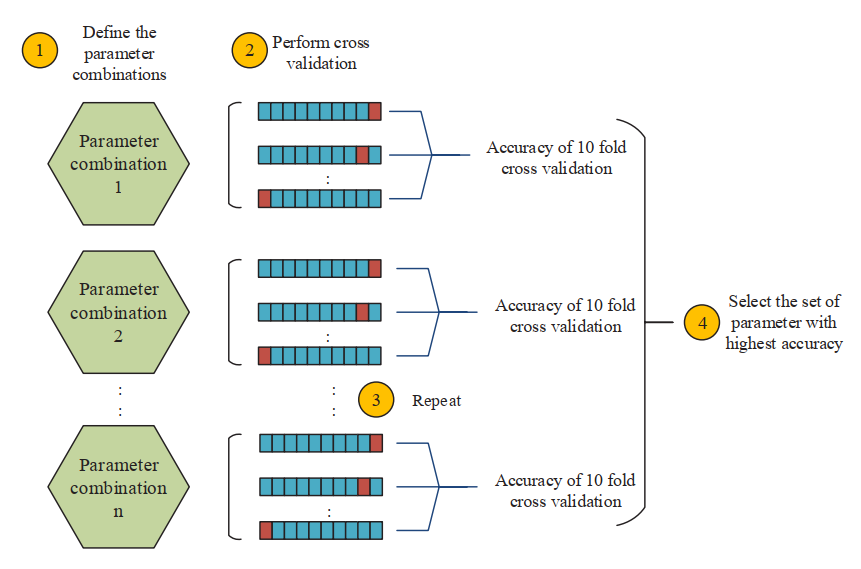

We can improve the generalization performance of machine learning algorithms by tuning their parameters.

NB doesn't have many parameters but in the previous weeks we saw that the performance of k-Nearest Neighbor algorithm depends on the number of neighbors and distance measure type, the performance of regression models depends on the values of <b>alpha</b> and <b>C</b>.

In sklearn we can use grid search with cross-validation to search through different parameter combinations and select the best one.

Let's consider k-nearest neighbor (k-NN) as an example and tune two of its parameters by considering the following values:
- number of neareast neighbours <b>n_neighbours</b> = 1, 3, 5, 11 and 13
- distance measure - Manhattan and Euclidean, which can be controlled by the value of parameter <b>p</b>, 1 or 2 respectively

This gives us 5 x 2 combinations of paramneter values. We would like to find the best combination - the one that we expect to generalise well on new examples.

We will use the following procedure, called <b>grid-search with cross-validation for parameter tuning</b>:

*Pseudocode:*

Create the parameter grid (i.e. the parameter combinations)
Split the data into training set and test set
For each parameter combination
    Train a k-NN classifier on the training data using 10-fold cross-validation as an evaluation procedure
    Compute the cross-validation accuracy cv_acc
    If cv_acc > best_cv_acc
       best_cv_acc = cv_acc
       best_parameters = current parameters
Rebuild the k-NN model using the whole training data and best_parameters
Evaluate it on the test data and report the results

- The data is split into training set and test set
- The cross-validation loop uses the training data. It is performed for every parameter combination. Its purpose is to select the best parameter combination - the one with the highest cross-validation accuracy. This involves, for every parameter combination, building 10 models on 90% of the training data (9 folds) and evaluating them on the remaining 10% (1 fold).
- Once this is done, a new model is trained using the selected best parameter combination on the <b>whole training set</b> and evaluated on the test set.

Code for our example:

In [ ]:
param_grid = {'n_neighbors': [1, 3, 5, 11, 15],
              'p': [1, 2]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,
                          return_train_score=True)


grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Parameter grid:
{'n_neighbors': [1, 3, 5, 11, 15], 'p': [1, 2]}
Test set score: 0.95
Best parameters: {'n_neighbors': 15, 'p': 2}
Best cross-validation score: 0.98
Best estimator:
KNeighborsClassifier(n_neighbors=15)


Explanation: We create an object of type GridSearchCV, which is then fitted to the <b>training</b> data. This fitting includes 2 things:
1. Searching for and determining the best parameter combination - the one with the best cross-validation accuracy <b>and</b>
2. Building a new model on the whole training set with the best parameter combination from 1.

It is important to understand the difference between <b>best cross-validation score</b> and <b>test set score </b>:
- <b>best cross-validation score</b> is the mean cross-validation accuracy, with cross-validation performed on the <b>training set</b>. This step involves building 10 models on the training data, each time using 9 folds together (90% of the training data) to create the model and testing this model the remaining 10th fold (10% of the training data). The purpose of this step is to select the best parameter combination, which is the one with the highest cross-validation accuracy.
- <b>test set score</b> - this is the the accuracy on the test of a model that was created using the <b>whole training set</b> (100%) with the selected parameters. This is the result that we report as a measure of generalization performance.

## Summary

In [ ]:
nb = GaussianNB().fit(X_train, y_train)
scores = cross_val_score(nb, iris.data, iris.target, cv=10)
scores = cross_val_score(nb, iris.data, iris.target, cv=one_out)

param_grid = {'n_neighbors': [1, 3, 5, 11, 15], 'p': [1, 2]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.95


## Acknowledgements

This tutorial is based on:

Aurelien Geron (2022). Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow, O'Reilly.

Andreas C. Mueller and Sarah Guido (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists, O'Reilly.
